# Orange EDA

Welcome to the **Orange Fruit EDA ** notebook. This notebook provides a comprehensive guide for building a machine learning model to classify strawberry images.

---

### Table of Contents
1. [Importing Libraries](#Importing-Libraries)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
   - [Inspecting the Dataset](#1-Inspecting-the-Dataset)
   - [Visualizing Class Distribution](#2-Visualizing-Class-Distribution)
   - [Visualizing Sample Images](#3-Visualizing-Sample-Images)
   - [Checking Image Dimensions](#4-Checking-Image-Dimensions)
   - [Summary Statistics](#5-Summary-Statistics)
   - [Detecting Outliers](#6-Detecting-Outliers)
   - [RGB Channel Analysis](#7-RGB-Channel-Analysis)
   - [Blurriness Analysis](#8-Blurriness-Analysis)


---

## Importing Libraries

In [1]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow and Keras for building the model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set a random seed for reproducibility
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


# Exploratory Data Analysis (EDA)



## Examine the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the strawberry data
data_dir = '/content/drive/MyDrive/Milan-Urban-Farming/Task3-Smart Pest Management/Data collection/Image Collection/orange - Swathy/Orange fruit_Split'
print(os.listdir(data_dir ))


Mounted at /content/drive
['train', 'test', 'validation']


In [3]:

# List of subdirectories
sub_dirs = ['train', 'validation', 'test']
total_images = 0

for sub_dir in sub_dirs:
    path = os.path.join(data_dir, sub_dir)
    classes = os.listdir(path)
    print(f"Number of classes in '{sub_dir}': {len(classes)}")

    sub_dir_total_images = 0
    for class_name in classes:
        class_path = os.path.join(path, class_name)
        num_images = len(os.listdir(class_path))
        sub_dir_total_images += num_images  # Add to subdirectory total
        print(f" - {class_name}: {num_images} images")
    print("\n")
    total_images += sub_dir_total_images

# Print the overall total number of images
print(f"Total number of images across all datasets: {total_images}")

Number of classes in 'train': 8
 - pest_psyllid: 19 images
 - fungus_penicillium: 34 images
 - bacteria _citrus: 23 images
 - Canker: 223 images
 - Black spot: 180 images
 - Greening: 308 images
 - healthy: 328 images
 - Scab: 12 images


Number of classes in 'validation': 8
 - pest_psyllid: 2 images
 - fungus_penicillium: 4 images
 - bacteria _citrus: 3 images
 - Canker: 28 images
 - Black spot: 22 images
 - Greening: 38 images
 - healthy: 41 images
 - Scab: 1 images


Number of classes in 'test': 8
 - pest_psyllid: 3 images
 - fungus_penicillium: 5 images
 - bacteria _citrus: 3 images
 - Canker: 28 images
 - Black spot: 23 images
 - Greening: 39 images
 - healthy: 41 images
 - Scab: 21 images


Total number of images across all datasets: 1429


## Visualize class distribution

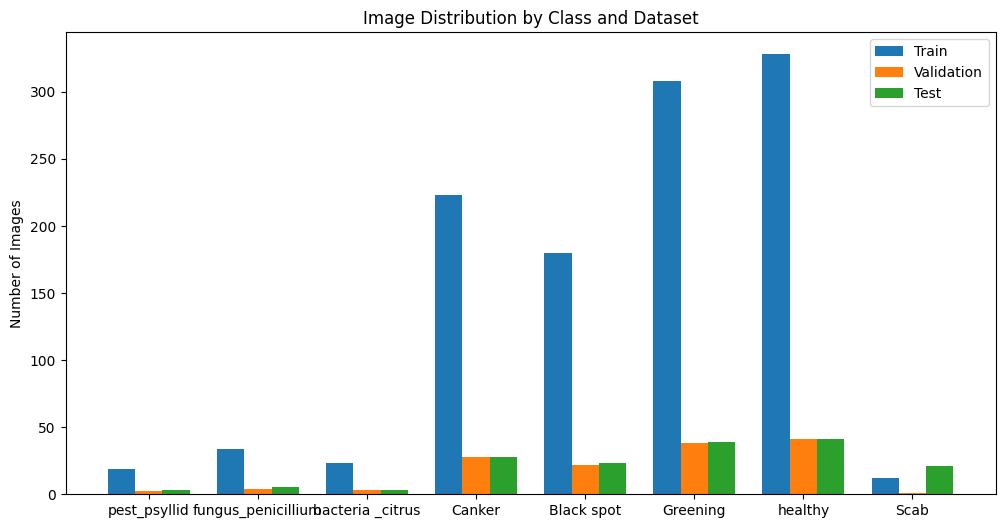

In [4]:
# Function to count images per class
def count_images(directory):
    classes = os.listdir(directory)
    class_counts = {}
    for class_name in classes:
        class_path = os.path.join(directory, class_name)
        class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count images in training, validation, and test sets
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')

train_counts = count_images(train_dir)
validation_counts = count_images(validation_dir)
test_counts = count_images(test_dir)

# Plotting the distribution
labels = list(train_counts.keys())
train_values = list(train_counts.values())
validation_values = list(validation_counts.values())
test_values = list(test_counts.values())

x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, train_values, width, label='Train')
rects2 = ax.bar(x, validation_values, width, label='Validation')
rects3 = ax.bar(x + width, test_values, width, label='Test')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Number of Images')
ax.set_title('Image Distribution by Class and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


### Observations

1. **Class Imbalance**:
   - There is a noticeable class imbalance in the dataset. The "healthy" class has the highest number of images across all datasets, with 328 images in the training set.
   - In contrast, the "Scab" class has the fewest images, with only 12 images in the training set. This disparity in class representation could lead to a biased model that may favor the classes with more samples.

2. **Impact on Model Performance**:
   - The class imbalance could affect the model’s ability to accurately classify the minority classes more effectively due to their higher representation in the dataset.

3. **Need for Data Augmentation or Resampling**:
   - To mitigate the effects of class imbalance, techniques such as data augmentation for the minority classes, oversampling, or class weighting in the loss function will be considered.


4. **Potential for Transfer Learning**:
   - Considering the limited number of images in some classes, using a pre-trained model should help improve model performance by utilizing features learned from larger, more diverse datasets.


## 3. Display sample images

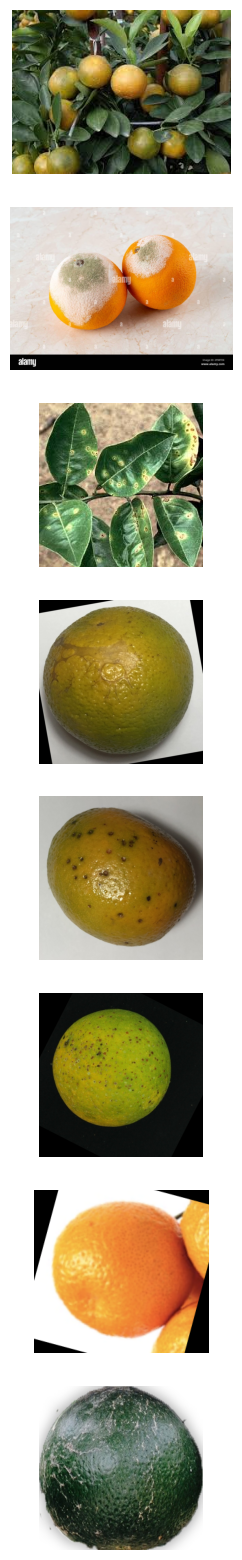

In [23]:
# Function to display sample images from each class
def display_samples(directory, num_samples=1):
    classes = os.listdir(directory)
    plt.figure(figsize=(30, 20))

    for i, class_name in enumerate(classes):
        class_path = os.path.join(directory, class_name)
        sample_images = os.listdir(class_path)[:num_samples]
        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(class_path, img_name)
            img = plt.imread(img_path)
            plt.subplot(len(classes), num_samples, i*num_samples + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                plt.ylabel(class_name, size='large')


    plt.show()

# Display samples from training, validation, and test sets
display_samples(train_dir)


## Check Image Dimensions

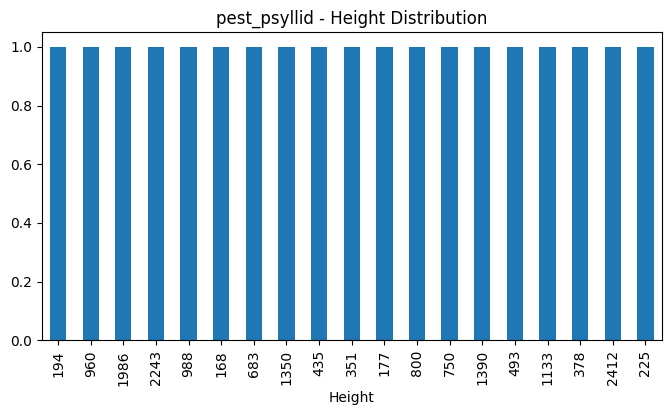

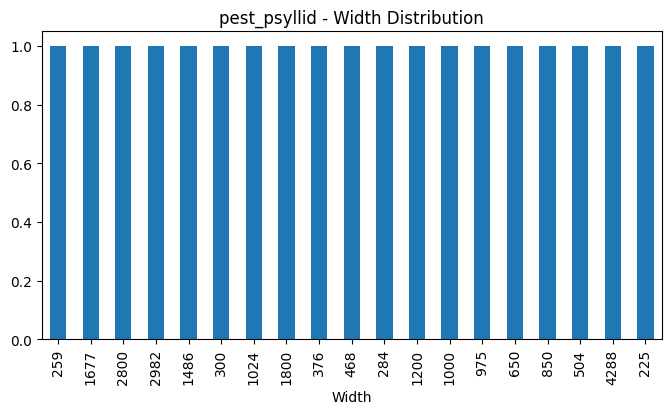

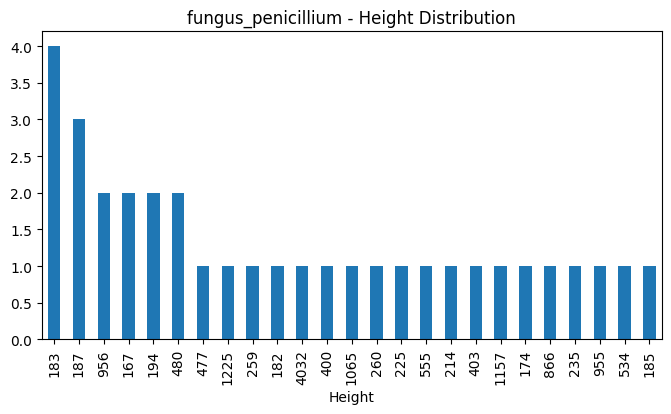

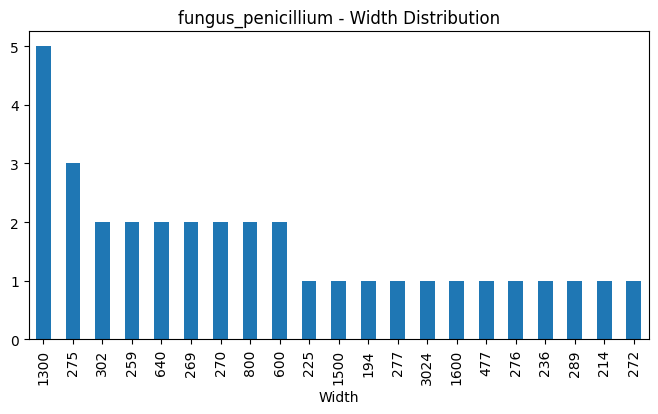

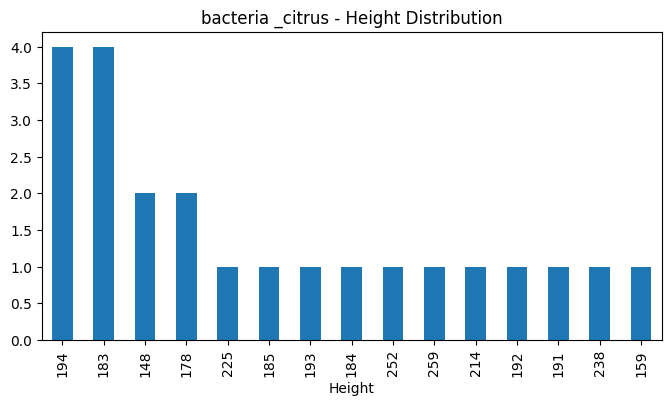

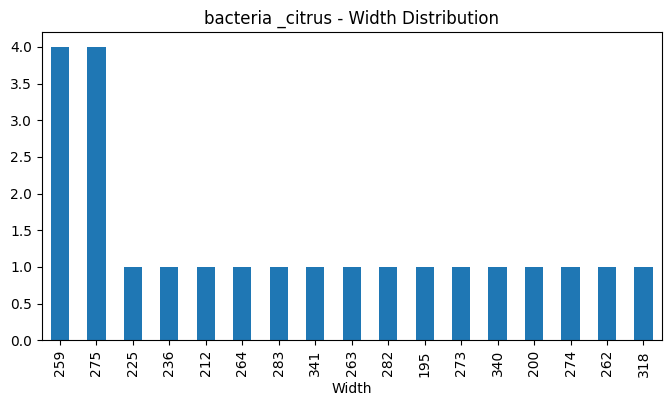

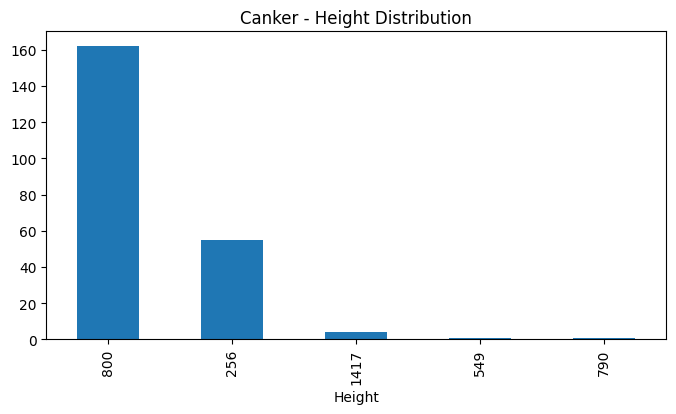

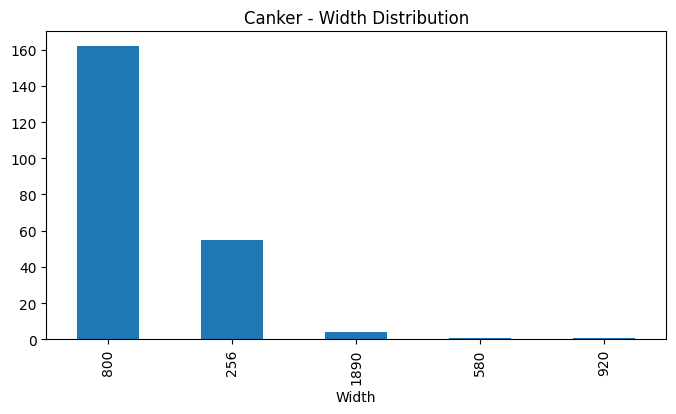

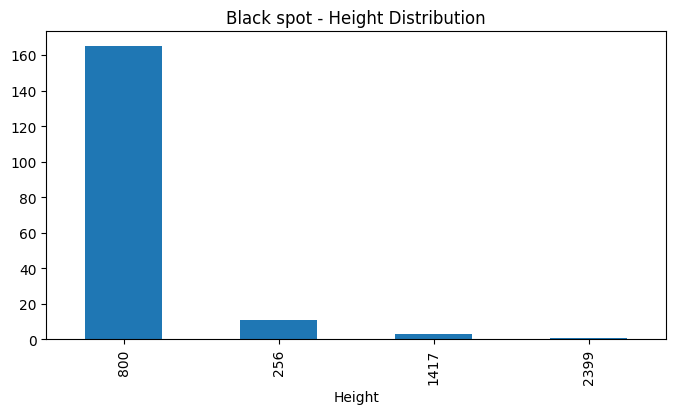

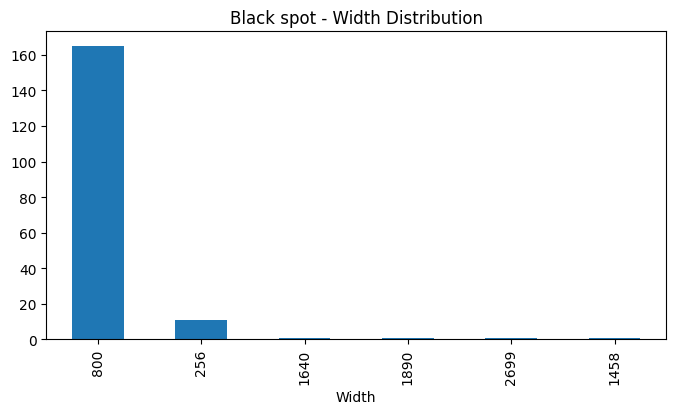

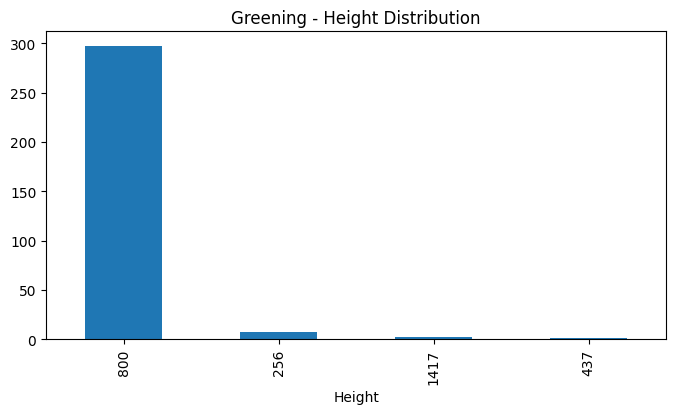

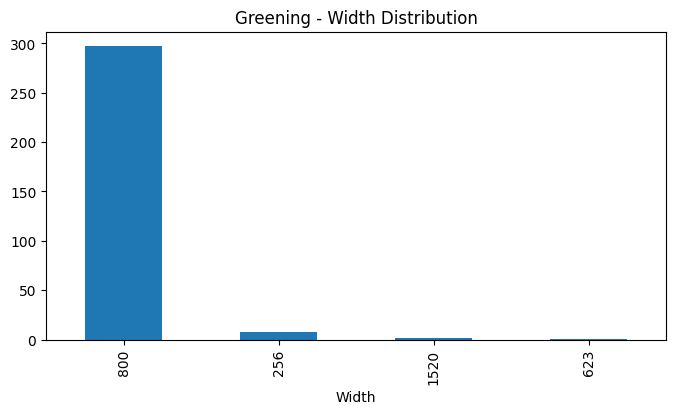

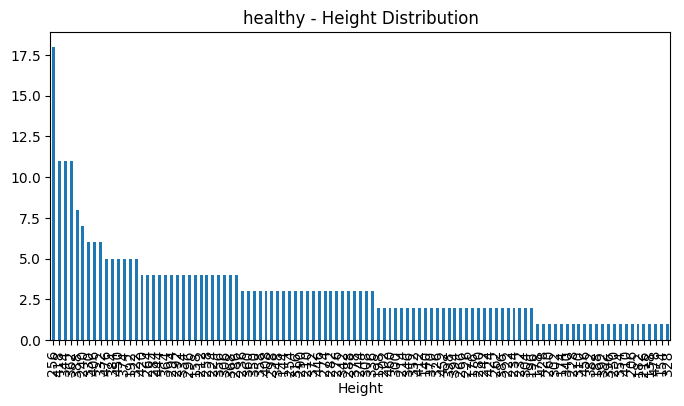

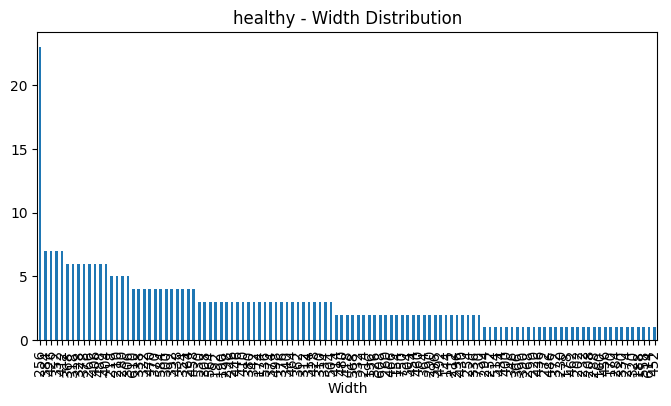

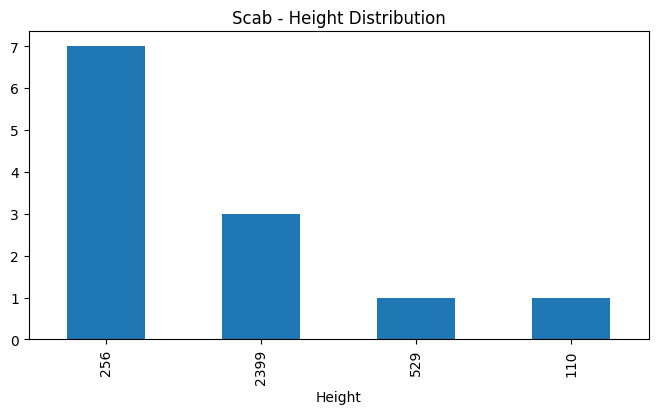

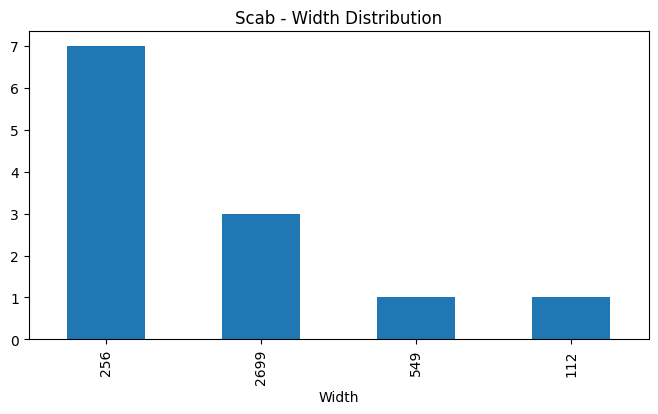

In [7]:
# Function to check dimensions and calculate stats for each class
def check_image_dimensions_by_class(directory):
    class_dimensions = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        dimensions = []
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:  # Check if image is read correctly
                dimensions.append(img.shape[:2])
        class_dimensions[class_name] = pd.DataFrame(dimensions, columns=['Height', 'Width'])

    return class_dimensions

# Now, gather and display stats for all classes
class_dimensions = check_image_dimensions_by_class(train_dir)

# Display stats for each class
for class_name, df in class_dimensions.items():

    # Plot height distribution
    df['Height'].value_counts().plot(kind='bar', title=f'{class_name} - Height Distribution', figsize=(8, 4))
    plt.show()

    # Plot width distribution
    df['Width'].value_counts().plot(kind='bar', title=f'{class_name} - Width Distribution', figsize=(8, 4))
    plt.show()



### Summary statistics


In [32]:
# Summary statistics for image dimensions
for class_name, df in class_dimensions.items():
    print(f"\nSummary statistics for {class_name}:")
    print(df.describe())





Summary statistics for pest_psyllid:
            Height        Width
count    19.000000    19.000000
mean    900.842105  1218.315789
std     700.213084  1097.097132
min     168.000000   225.000000
25%     364.500000   422.000000
50%     750.000000   975.000000
75%    1241.500000  1581.500000
max    2412.000000  4288.000000

Summary statistics for fungus_penicillium:
            Height        Width
count    34.000000    34.000000
mean    537.941176   652.617647
std     701.496579   610.625661
min     167.000000   194.000000
25%     185.500000   270.000000
50%     247.000000   295.500000
75%     549.750000   800.000000
max    4032.000000  3024.000000

Summary statistics for bacteria _citrus:
           Height       Width
count   23.000000   23.000000
mean   193.565217  265.391304
std     28.227688   36.864296
min    148.000000  195.000000
25%    183.000000  259.000000
50%    191.000000  264.000000
75%    194.000000  275.000000
max    259.000000  341.000000

Summary statistics for Canker

### Detecting Outliers

Number of outliers: 20


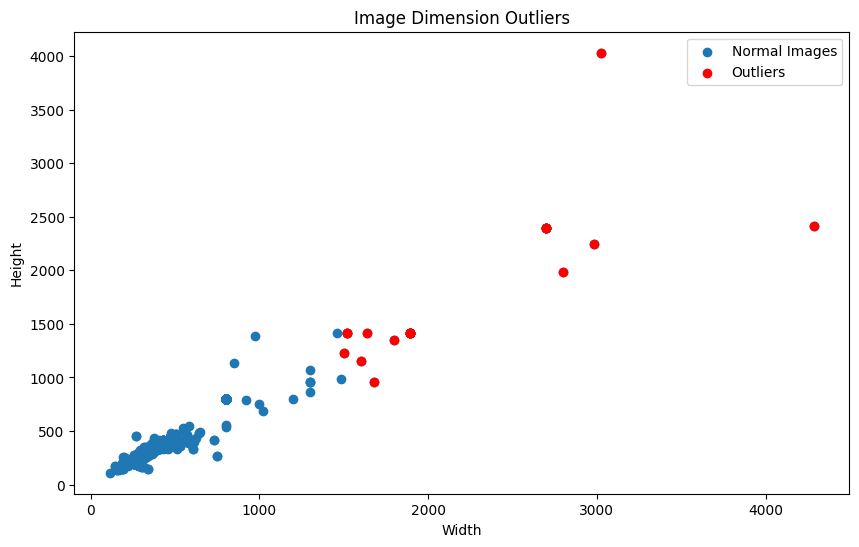

In [13]:
# Detecting outliers based on image dimensions

dimensions_df = pd.concat(class_dimensions.values(), ignore_index=True)
Q1 = dimensions_df.quantile(0.25)
Q3 = dimensions_df.quantile(0.75)
IQR = Q3 - Q1

outliers = dimensions_df[((dimensions_df < (Q1 - 1.5 * IQR)) | (dimensions_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Number of outliers: {len(outliers)}")

# Plotting the outliers
plt.figure(figsize=(10, 6))
plt.scatter(dimensions_df['Width'], dimensions_df['Height'], label='Normal Images')
plt.scatter(outliers['Width'], outliers['Height'], color='red', label='Outliers')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Dimension Outliers')
plt.legend()
plt.show()

### Observations

The image dimensions across different classes show significant variationin both height and width. Therefore all images will be standardized to a consistent size such as 256x256 and also cropped. Also, since only a small  percentage of images  are outliers are and all images will be resized, these will be left in the data.


## Blurriness Analysis
Evaluate the sharpness of images by calculating the variance of the Laplacian.

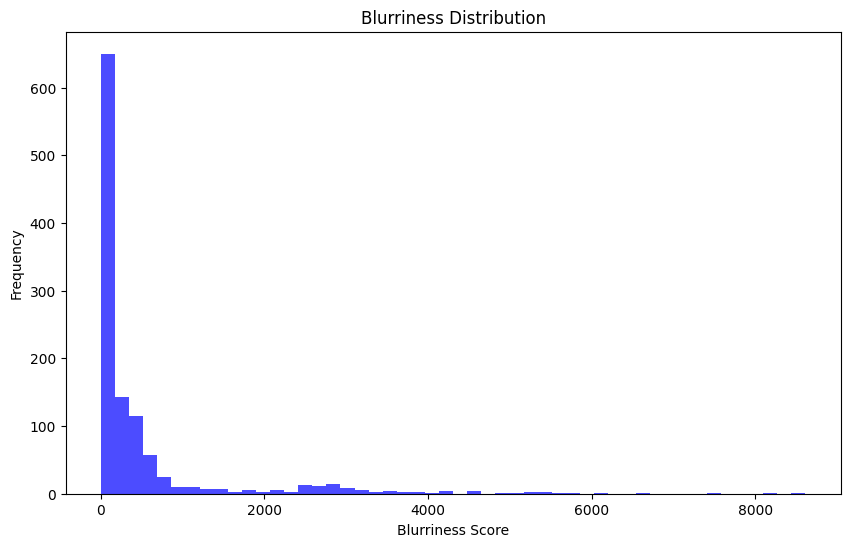

Number of blurry images: 438


In [33]:
# Function to calculate blurriness
def calculate_blurriness(directory):
    blurriness_scores = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            blurriness = cv2.Laplacian(img, cv2.CV_64F).var()
            blurriness_scores.append(blurriness)

    return blurriness_scores

# Calculate blurriness scores in the training set
blurriness_scores = calculate_blurriness(train_dir)
blurriness_df = pd.DataFrame(blurriness_scores, columns=['Blurriness'])

# Plotting the blurriness scores
plt.figure(figsize=(10, 6))
plt.hist(blurriness_scores, bins=50, color='blue', alpha=0.7)
plt.title('Blurriness Distribution')
plt.xlabel('Blurriness Score')
plt.ylabel('Frequency')
plt.show()

# Identifying potential blurry images
threshold = 100.0  # Adjust based on domain knowledge
blurry_images = blurriness_df[blurriness_df['Blurriness'] < threshold]
print(f"Number of blurry images: {len(blurry_images)}")



### Observations

Given that 30% of the images are blurry in the dataset, we will use CLAHE to enhance the contrast, RandomBrightnessContrast to adjust lighting, and GaussNoise to random noise to sharpen features.

## RGB Channel Analysis

Analyze the distribution of RGB channels to detect color inconsistencies.

RGB histograms for pest_psyllid:


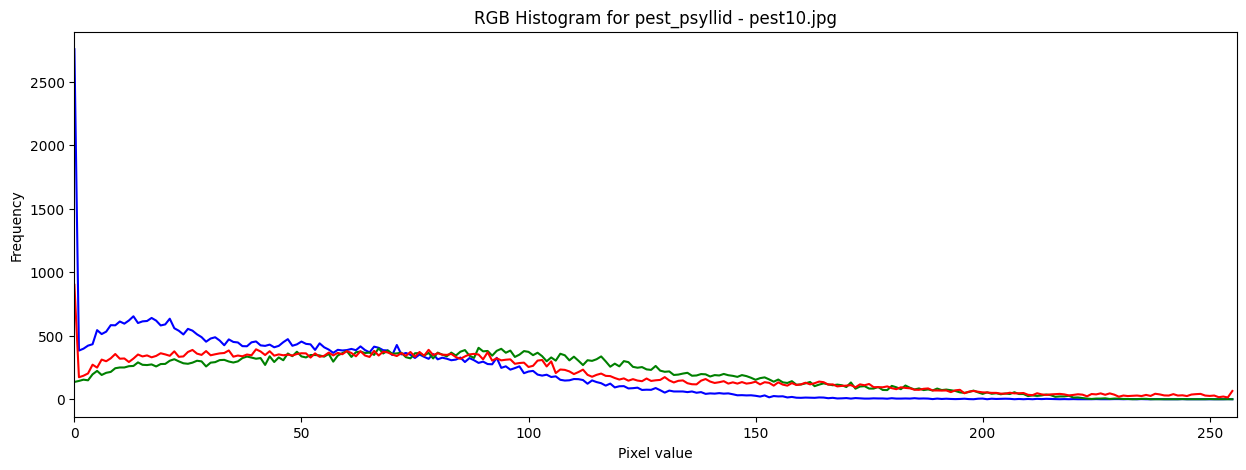

RGB histograms for fungus_penicillium:


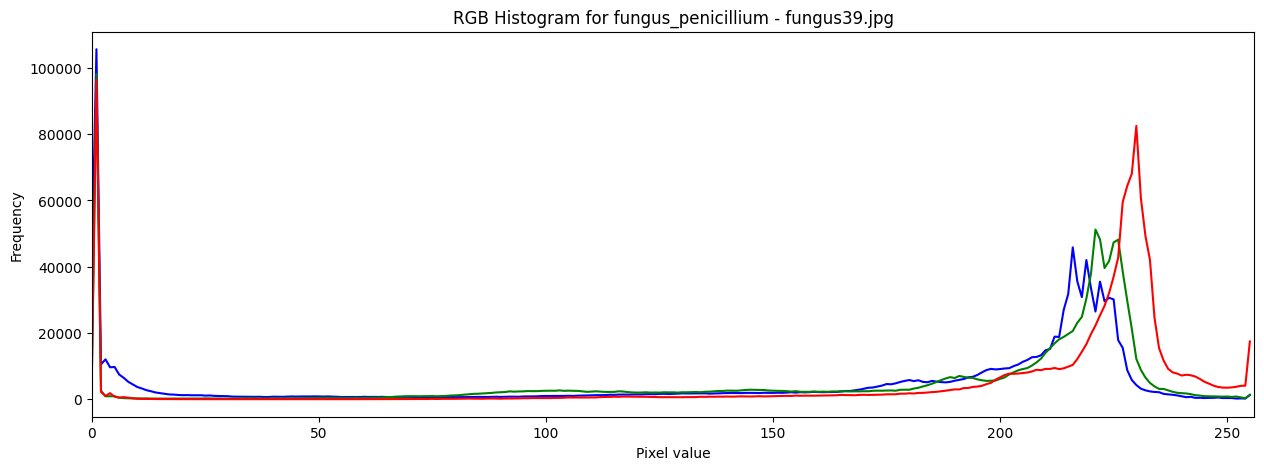

RGB histograms for bacteria _citrus:


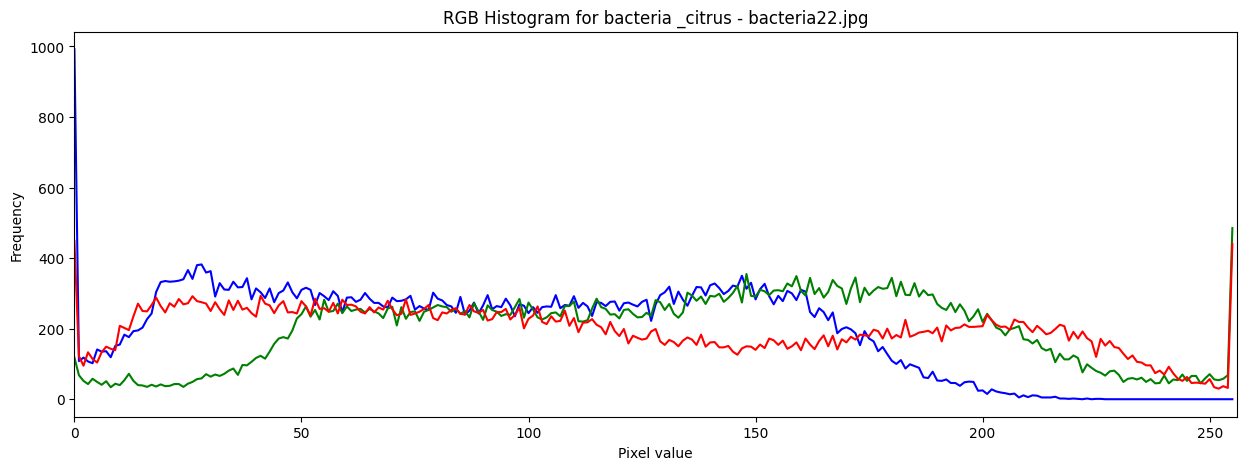

RGB histograms for Canker:


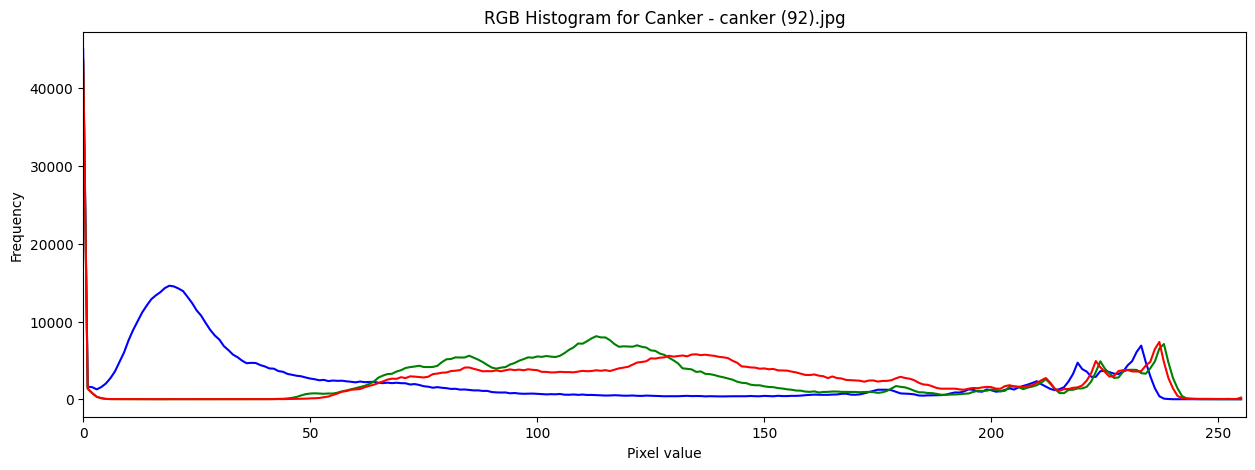

RGB histograms for Black spot:


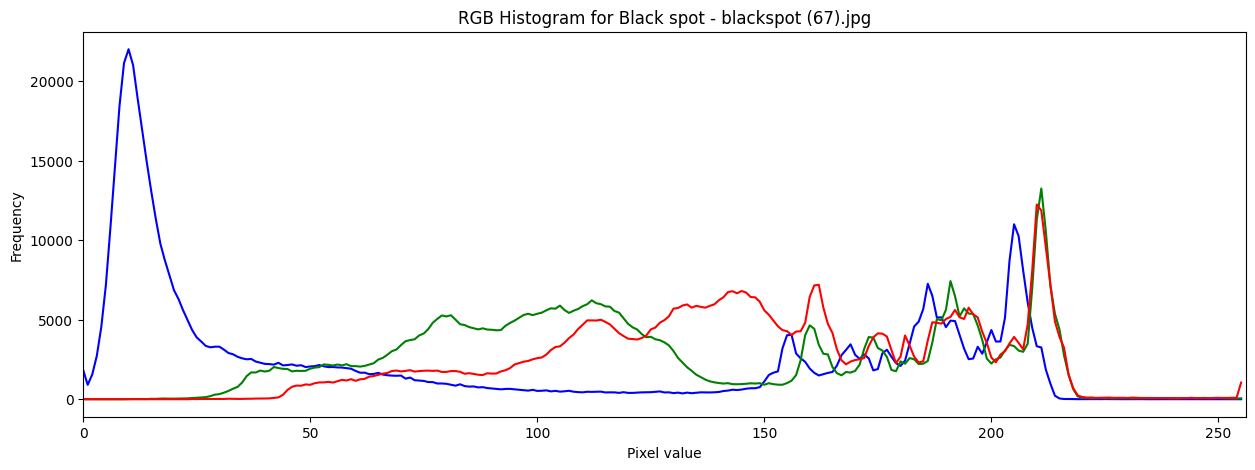

RGB histograms for Greening:


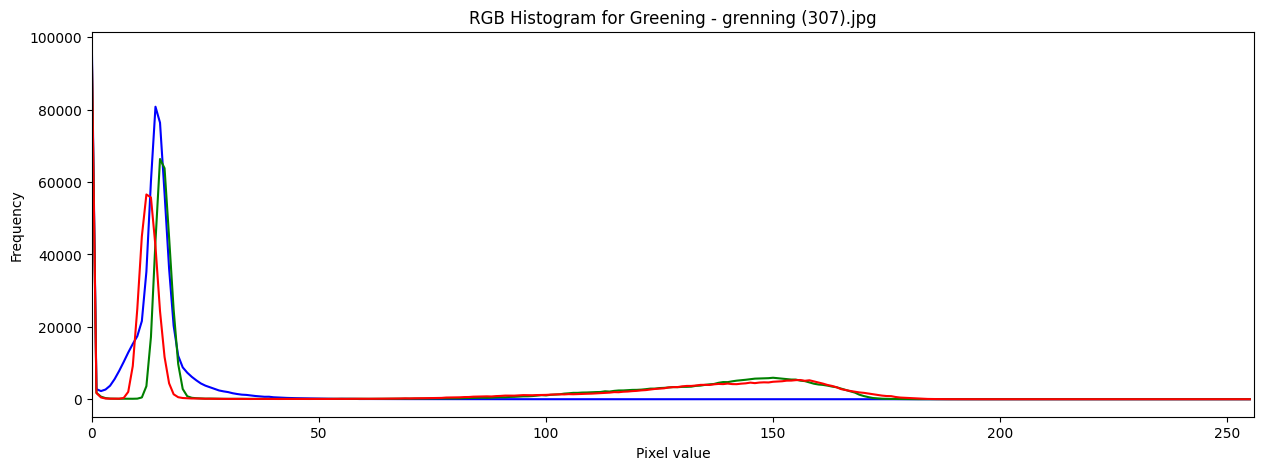

RGB histograms for healthy:


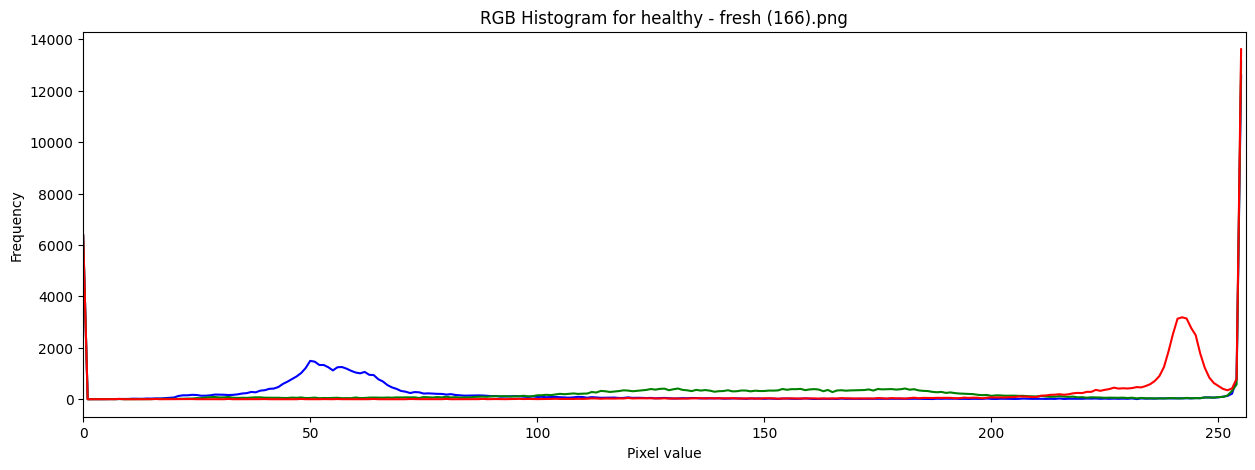

RGB histograms for Scab:


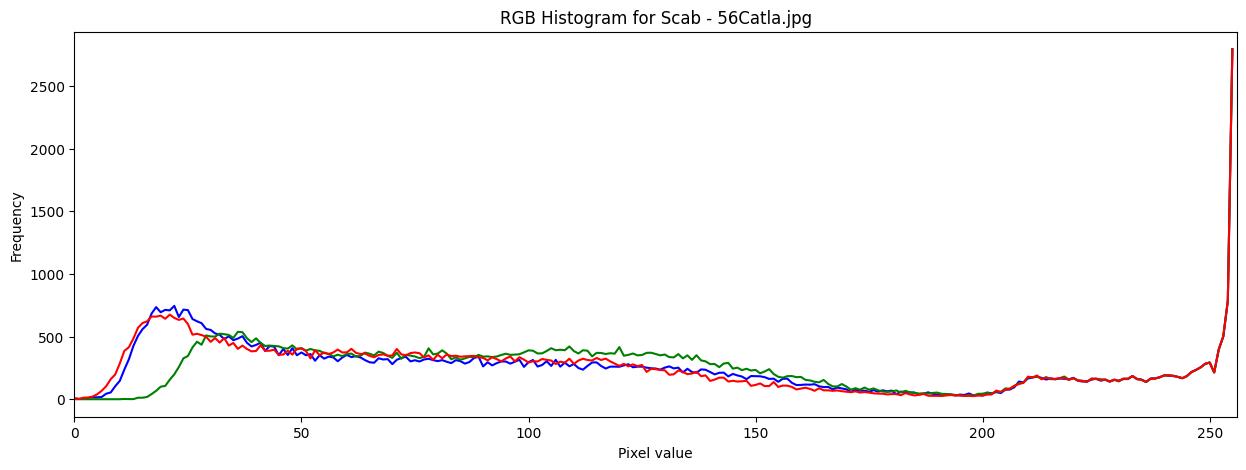

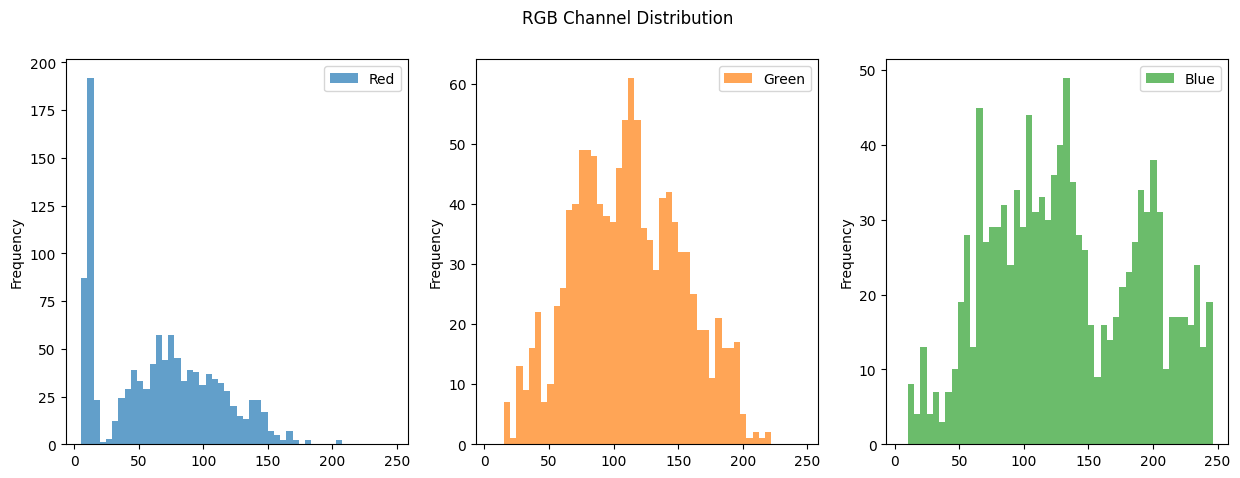

In [12]:
# Function to plot RGB histograms for each image and analyze RGB channels
def analyze_rgb_channels_and_plot_histograms(directory, num_samples=1):
    rgb_means = []

    # Iterate over each class
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        sample_images = os.listdir(class_path)[:num_samples]  # Select a few sample images

        print(f'RGB histograms for {class_name}:')

        # Iterate over each image in the class
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            # If we are still within the sample limit, plot histograms
            if img_name in sample_images:
                color = ('b', 'g', 'r')
                plt.figure(figsize=(15, 5))
                for i, col in enumerate(color):
                    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
                    plt.plot(histr, color=col)
                    plt.xlim([0, 256])
                plt.title(f'RGB Histogram for {class_name} - {img_name}')
                plt.xlabel('Pixel value')
                plt.ylabel('Frequency')
                plt.show()

            # Calculate mean RGB channels
            mean_rgb = np.mean(img, axis=(0, 1))
            rgb_means.append(mean_rgb)

    # Return the DataFrame with mean RGB values
    rgb_df = pd.DataFrame(rgb_means, columns=['Red', 'Green', 'Blue'])
    return rgb_df

# Analyzing RGB channels and plotting histograms in the training set
rgb_df = analyze_rgb_channels_and_plot_histograms(train_dir)

# Plotting RGB channel distributions across all images
rgb_df.plot(kind='hist', bins=50, alpha=0.7, title='RGB Channel Distribution', subplots=True, layout=(1, 3), figsize=(15, 5))
plt.show()
